Import necessary libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


In [2]:
with_mask_files = os.listdir("/Users/siddha-book/Desktop/Project/ML Project/Face Mask Detection/data/with_mask")
print(with_mask_files[0:5]) #this will print the first 5 file names

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']


In [3]:
without_mask_files = os.listdir("/Users/siddha-book/Desktop/Project/ML Project/Face Mask Detection/data/without_mask")
print(without_mask_files[0:5]) #this will print the first 5 file names

['without_mask_3593.jpg', 'without_mask_2855.jpg', 'without_mask_1384.jpg', 'without_mask_1390.jpg', 'without_mask_2699.jpg']


In [4]:
print("Number of masked images are: ", len(with_mask_files))
print("Number of un-masked images are: ", len(without_mask_files))

Number of masked images are:  3725
Number of un-masked images are:  3828


In [5]:
# Create Label
# with mask = 1
# without mask = 0

with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828


In [6]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
#combine them 
labels = with_mask_labels + without_mask_labels

In [8]:
print(len(labels))
print(labels[0:5])

7553
[1, 1, 1, 1, 1]


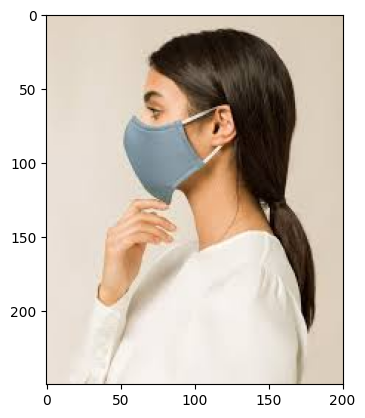

In [9]:
#display the images
mask_img = mpimg.imread('data/with_mask/with_mask_2140.jpg')
imgplot = plt.imshow(mask_img)

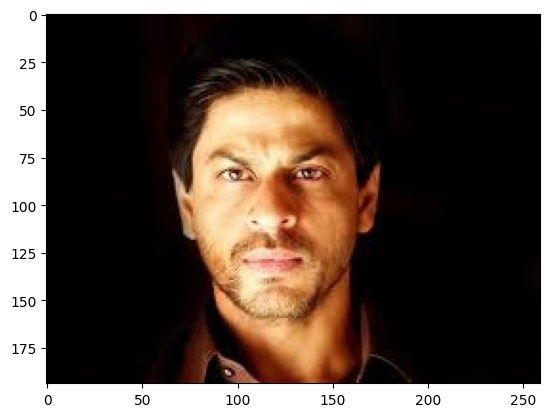

In [10]:
#display the images
unmask_img = mpimg.imread('data/without_mask/without_mask_3593.jpg')
imgplot = plt.imshow(unmask_img)

All images are of different sizes. We need to resize them

**Image Processing**
1. resize the images
2. convert them to numpy array

In [11]:
mask_path = 'data/with_mask/'
data = []

for img_file in with_mask_files:

    image = Image.open(mask_path + img_file) #read the file
    image = image.resize((128,128)) #resize it
    image = image.convert('RGB') #convert all to RGB
    image = np.array(image) #convert to numpy array
    data.append(image) #add to the list

unmask_path = 'data/without_mask/'

for img_file in without_mask_files:

    image = Image.open(unmask_path + img_file) #read the file
    image = image.resize((128,128)) #resize it
    image = image.convert('RGB') #convert all to RGB
    image = np.array(image) #convert to numpy array
    data.append(image) #add to the list


/Users/siddha-book/Desktop/Project/ML Project/Face Mask Detection/.venv/lib/python3.11/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
len(data)

7553

In [13]:
data[0]

array([[[226, 213, 197],
        [226, 213, 197],
        [226, 213, 197],
        ...,
        [214, 201, 182],
        [214, 201, 182],
        [214, 201, 182]],

       [[226, 213, 197],
        [226, 213, 197],
        [226, 213, 197],
        ...,
        [214, 201, 182],
        [214, 201, 182],
        [214, 201, 182]],

       [[226, 213, 197],
        [226, 213, 197],
        [226, 213, 197],
        ...,
        [214, 201, 182],
        [214, 201, 182],
        [214, 201, 182]],

       ...,

       [[235, 225, 216],
        [235, 225, 216],
        [235, 225, 216],
        ...,
        [219, 206, 189],
        [219, 206, 189],
        [219, 206, 189]],

       [[235, 225, 216],
        [235, 225, 216],
        [235, 225, 216],
        ...,
        [219, 206, 189],
        [219, 206, 189],
        [219, 206, 189]],

       [[235, 225, 216],
        [235, 225, 216],
        [235, 225, 216],
        ...,
        [217, 204, 187],
        [217, 204, 187],
        [217, 204, 187]]

In [14]:
type(data[0])

numpy.ndarray

In [15]:
data[0].shape #128,128 with 3 channels = RGB

(128, 128, 3)

In [16]:
#convert the data list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [17]:
type(X)
type(Y)

numpy.ndarray

In [18]:
print(X.shape, Y.shape)

(7553, 128, 128, 3) (7553,)


Building the Model

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
#scaling the data
X_train_scaled = X_train/255 
X_test_scaled = X_test/255

**CNN**

In [21]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [22]:
num_of_class = 2 #(one with mask, another without mask)

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class, activation='sigmoid')) #output layer

/Users/siddha-book/Desktop/Project/ML Project/Face Mask Detection/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [24]:
history = model.fit(X_train_scaled, 
                    Y_train, 
                    validation_split=0.1,
                    epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step - acc: 0.6706 - loss: 0.7013 - val_acc: 0.8612 - val_loss: 0.3316
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - acc: 0.8784 - loss: 0.3106 - val_acc: 0.8430 - val_loss: 0.3455
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - acc: 0.8918 - loss: 0.2576 - val_acc: 0.8893 - val_loss: 0.2634
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - acc: 0.9141 - loss: 0.2090 - val_acc: 0.8694 - val_loss: 0.3109
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - acc: 0.9220 - loss: 0.1945 - val_acc: 0.9107 - val_loss: 0.2596


In [25]:
#model evaluation
loss,accuracy = model.evaluate(X_test_scaled, Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9325 - loss: 0.1841


In [26]:
model.save('face_mask_detection_model.h5')

In [27]:
# Load the saved model
loaded_model = keras.models.load_model('face_mask_detection_model.h5')

# Evaluate the loaded model (optional)
loss, accuracy = loaded_model.evaluate(X_test_scaled, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.9325 - loss: 0.1841
Test Loss: 0.1793130487203598, Test Accuracy: 0.929847776889801


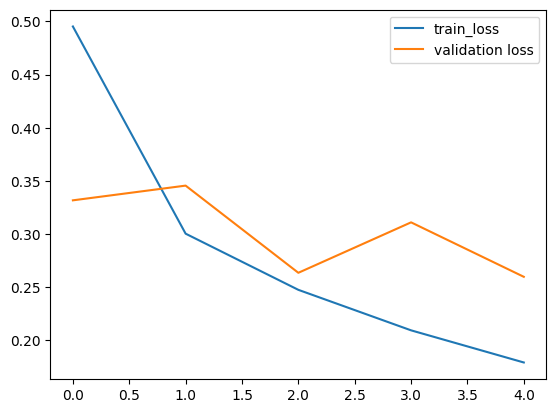

In [28]:
h = history

#plotting

plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

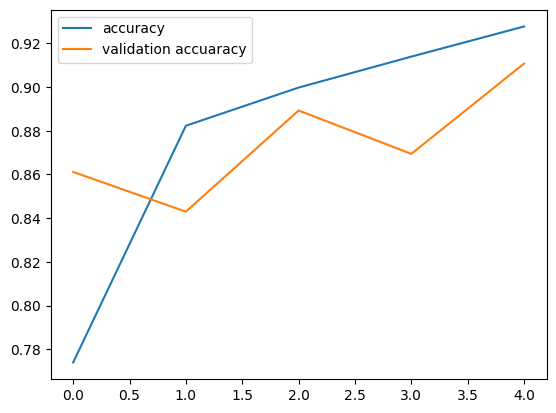

In [29]:
h = history

#plotting

plt.plot(h.history['acc'], label='accuracy')
plt.plot(h.history['val_acc'], label='validation accuaracy')
plt.legend()
plt.show()